<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [1]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy seaborn matplotlib xgboost

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [4]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A2 -> Flow rate


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 is not specified


In [5]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

In [6]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr[:20]

InputD10  InputC10    0.997912
InputD4   InputC4     0.985786
InputD1   InputC1     0.973743
InputA5   InputA3     0.860394
          InputC4     0.802451
InputB5   InputB3     0.800484
InputA5   InputD4     0.793131
InputD7   InputC7     0.772154
Target    InputD5     0.762300
InputD5   InputC5     0.742540
InputA3   InputC4     0.711730
InputD9   InputC9     0.700897
InputA3   InputD4     0.693287
InputC4   InputC2     0.572892
InputD4   InputC2     0.571811
InputA5   InputE1     0.569396
InputA3   InputE1     0.561188
Target    InputC5     0.559241
InputD4   InputE1     0.549919
InputE1   InputC4     0.536829
dtype: float64

The most correlated and interesting features are:

- D10 - C10 - Temperatures in both tanks
- D4 - C4 - Outside air
- D1 - C1 - 02 Percentage in Tanks
- A5 - A3 - ???? / Amount of sludge in water
   - This seems like a very important correlation, shame there's no description for A5, need to keep this in mind
- A5 - D4 - ???? / Outside air
  - Another correlation with the missing feature
- Target/D5 Height of the 2nd tank
  - The 2nd tank is more correlated with the target than the first tank
- A3 / C4 & D4 - Amount of sludge / Air outside

array([[<Axes: title={'center': 'InputC1'}>,
        <Axes: title={'center': 'InputC2'}>,
        <Axes: title={'center': 'InputC3'}>,
        <Axes: title={'center': 'InputC4'}>,
        <Axes: title={'center': 'InputC5'}>,
        <Axes: title={'center': 'InputC6'}>],
       [<Axes: title={'center': 'InputC7'}>,
        <Axes: title={'center': 'InputC8'}>,
        <Axes: title={'center': 'InputC9'}>,
        <Axes: title={'center': 'InputC10'}>,
        <Axes: title={'center': 'InputE1'}>,
        <Axes: title={'center': 'InputE2'}>],
       [<Axes: title={'center': 'InputE3'}>,
        <Axes: title={'center': 'InputD1'}>,
        <Axes: title={'center': 'InputD2'}>,
        <Axes: title={'center': 'InputD3'}>,
        <Axes: title={'center': 'InputD4'}>,
        <Axes: title={'center': 'InputD5'}>],
       [<Axes: title={'center': 'InputD6'}>,
        <Axes: title={'center': 'InputD7'}>,
        <Axes: title={'center': 'InputD8'}>,
        <Axes: title={'center': 'InputD9'}>,
      

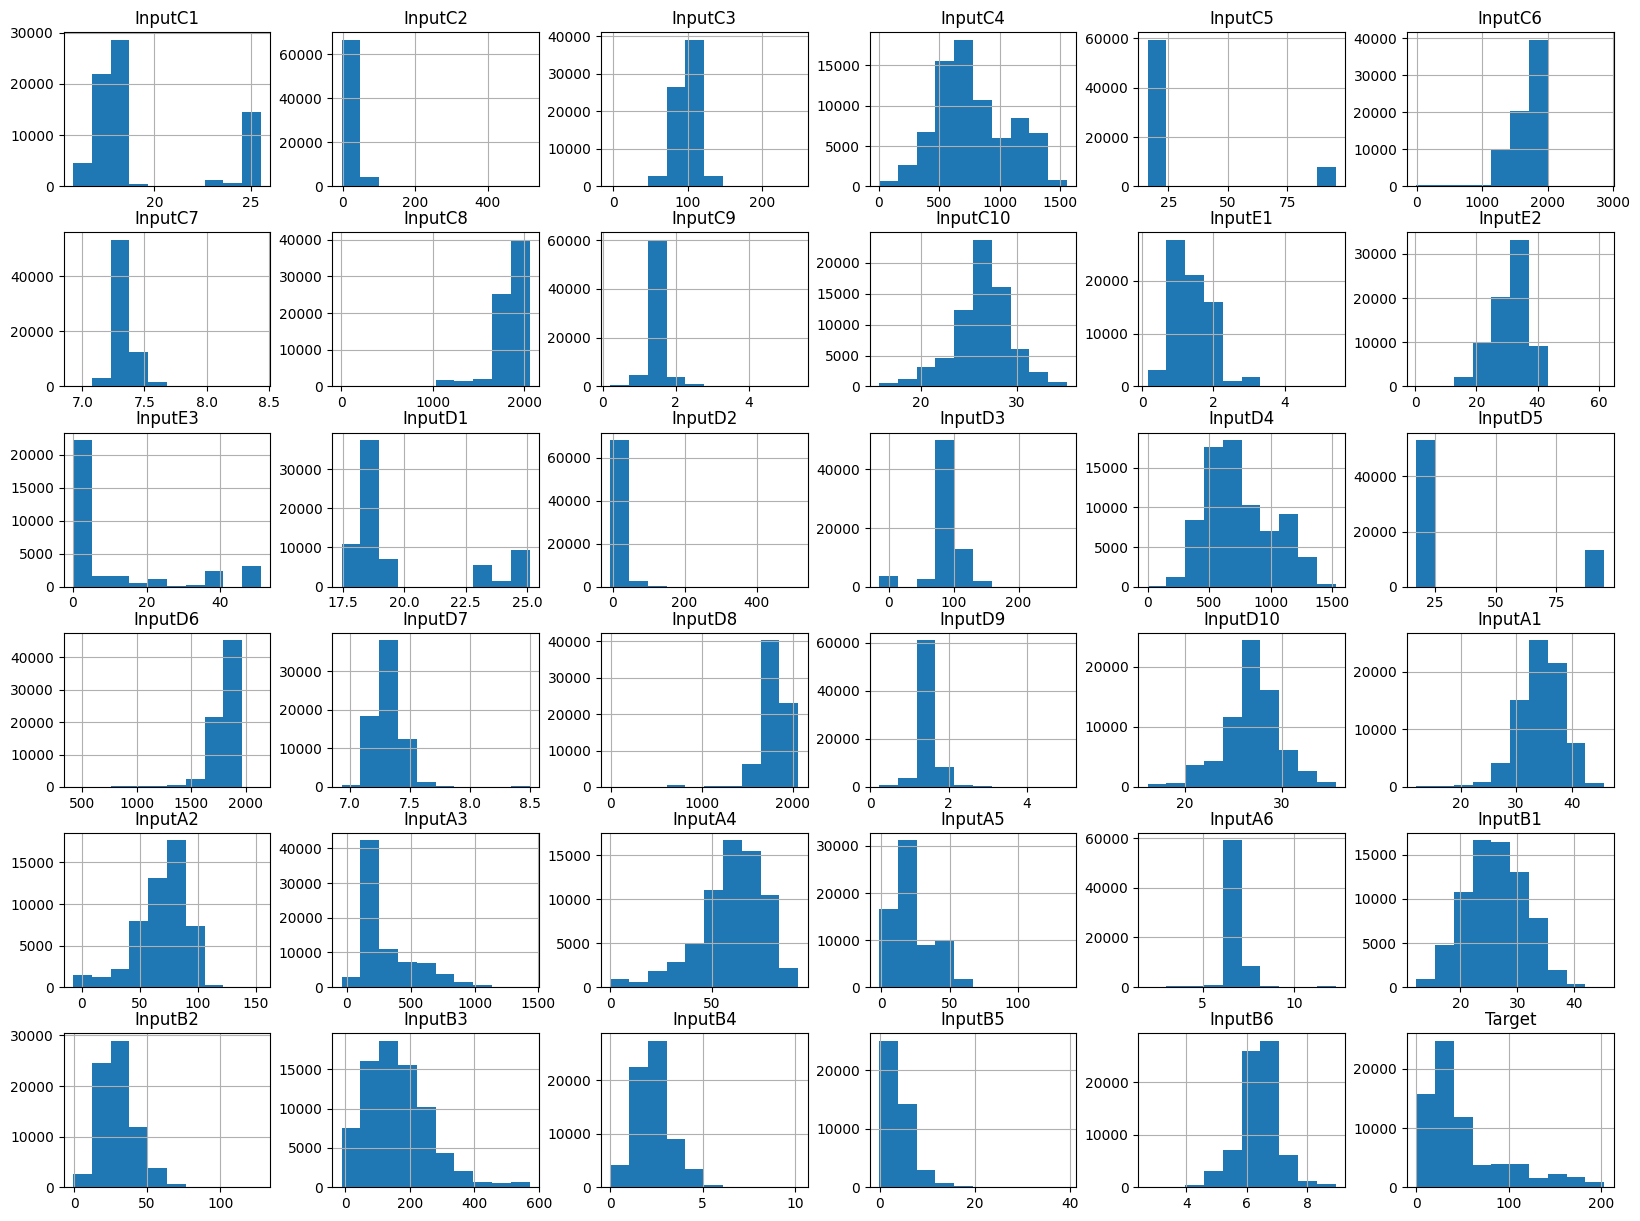

In [7]:
df.hist(figsize=(20,15))

## Exploration of Outliers

## Data Augmentation

The value that's null the most often is E3 - NO3 dissolved, let's assume that is because it is 0 or close to 0. Looking at the histogram, E3 is mostly 0.

In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)

df = pd.DataFrame(X, columns=df.columns, index=df.index)

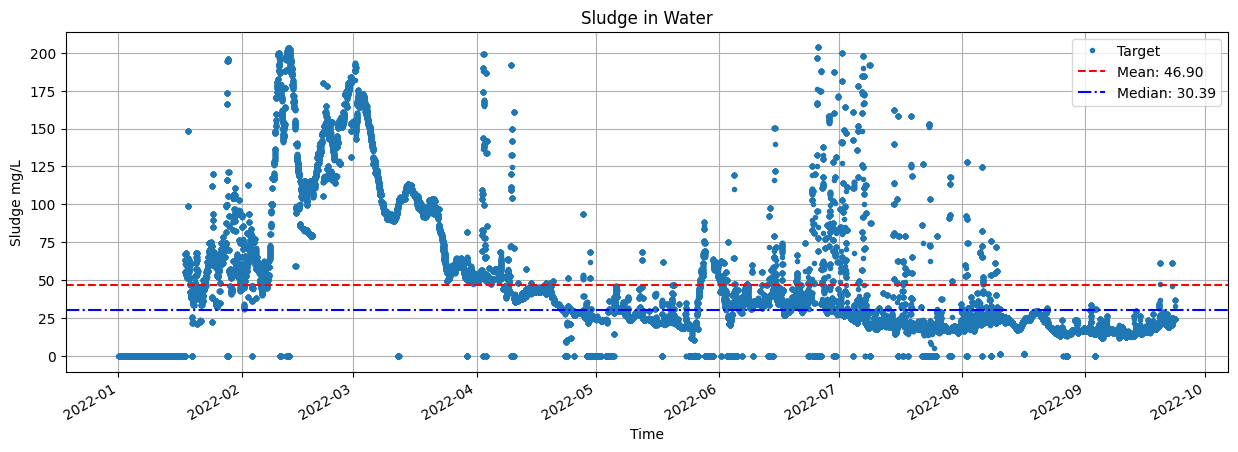

In [9]:
def plot_target(df):
  df['Target'].plot(
      style='.',
      figsize=(15, 5),
      title='Sludge in Water',
      grid=True,
      xlabel="Time",
      ylabel="Sludge mg/L"
      )

  mean_value = df['Target'].mean()
  median_value = df['Target'].median()

  plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

  plt.legend()
  plt.show()

plot_target(df)

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.

### Create Features

In [10]:
# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
#     df = df.copy()
#     df['hour'] = df.index.hour
#     df['dayofweek'] = df.index.dayofweek
#     df['quarter'] = df.index.quarter
#     df['month'] = df.index.month
#     df['year'] = df.index.year
#     df['dayofyear'] = df.index.dayofyear
#     df['dayofmonth'] = df.index.day
#     df['weekofyear'] = df.index.isocalendar().week
#     return df
# df = create_features(df)

### Investigating the seasonal anomalies

Null Ratio: 0.0


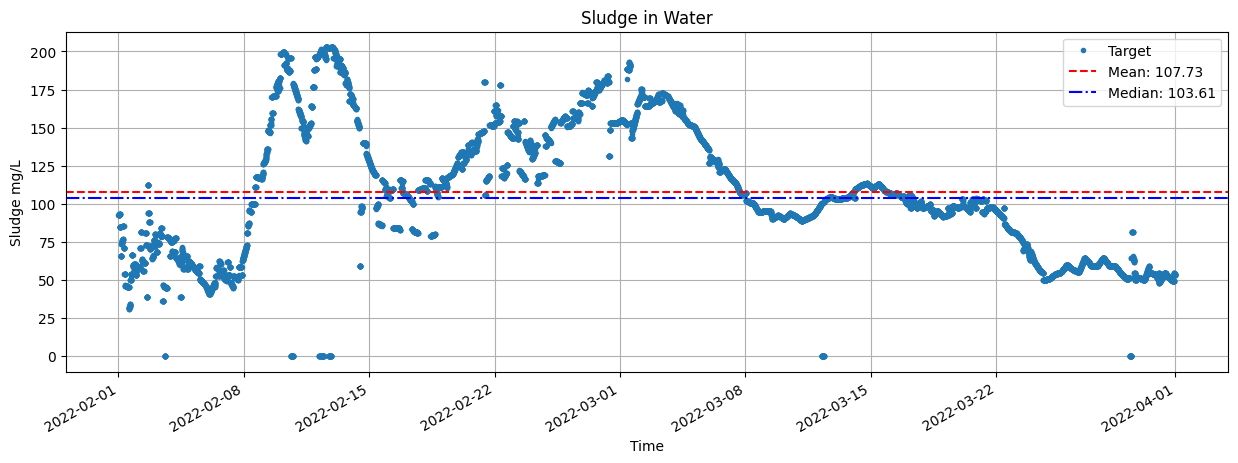

In [11]:
spring_anomalies = df.loc[(df.index > "02-01-2022") & (df.index < "04-01-2022")]
print(f"Null Ratio: {spring_anomalies['Target'].isnull().sum() / len(spring_anomalies)}")
plot_target(spring_anomalies)

Null Ratio: 0.0


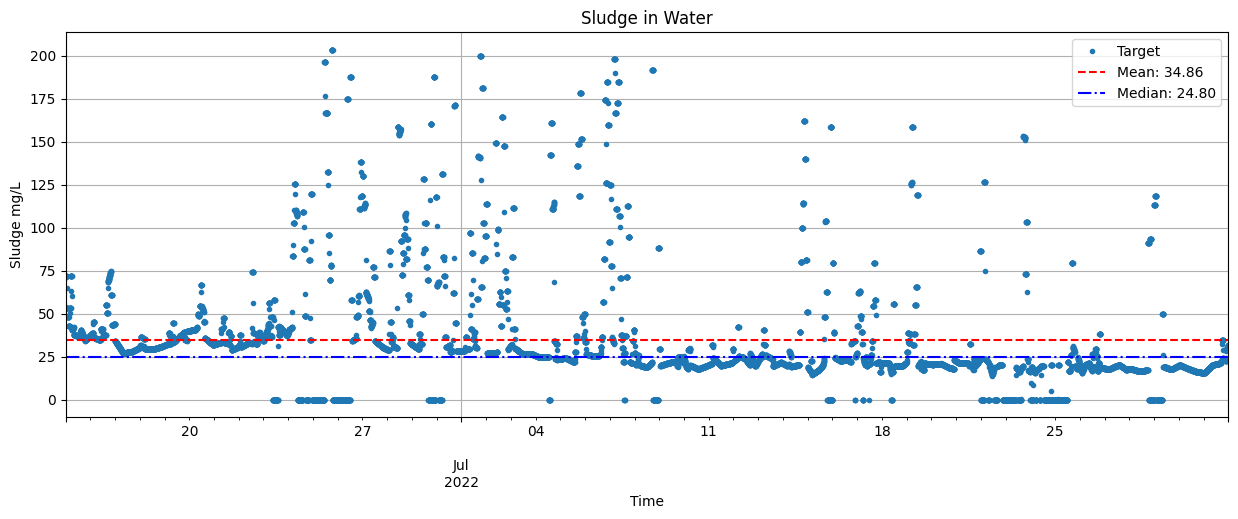

In [12]:
summer_anomalies = df.loc[(df.index > "06-15-2022") & (df.index < "08-01-2022")]
print(f"Null Ratio: {summer_anomalies['Target'].isnull().sum() / len(summer_anomalies)}")
plot_target(summer_anomalies)

For the summer anomalies, I would like to see only the outlier points

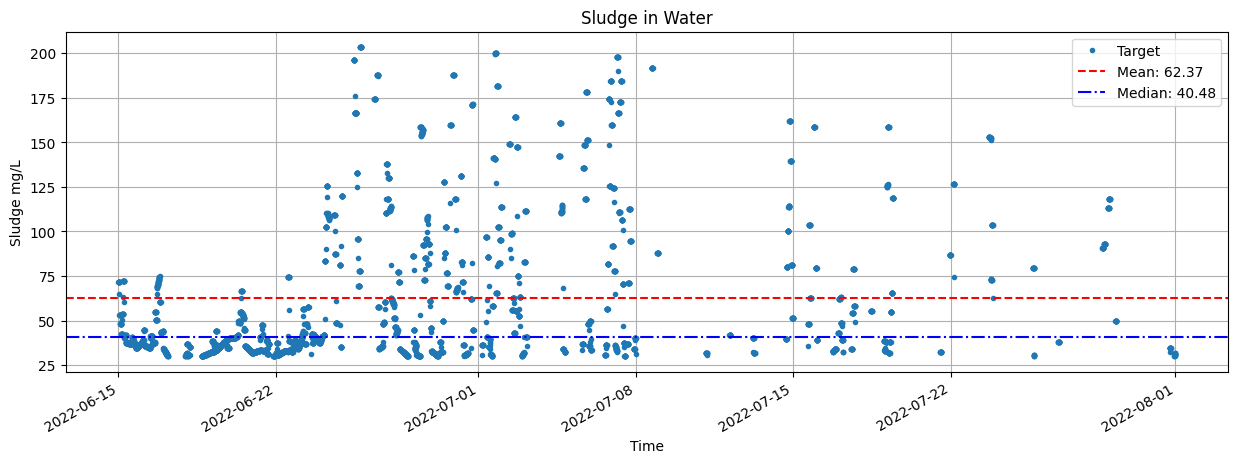

In [13]:
summer_anomalies = summer_anomalies[summer_anomalies['Target']> 30]
plot_target(summer_anomalies)

# Train our model(s)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, is_3d=False):
    """
    Evaluate the model
    """

    if is_3d:
        X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

## XGBoost - Winner!

In [16]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=10000,
    objective="reg:linear",
    eta=0.29967676424275075,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.98,
    colsample_bytree=0.8352332105721674,
    gamma=5.070672686392608,
    min_child_weight= 8.064241707732917,
)
reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=50,
    verbose=100
)


[0]	validation_0-rmse:61.46791	validation_1-rmse:61.11620


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:29:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4.99975	validation_1-rmse:7.41830
[200]	validation_0-rmse:3.25388	validation_1-rmse:6.26141
[300]	validation_0-rmse:2.46823	validation_1-rmse:5.84715
[400]	validation_0-rmse:2.06479	validation_1-rmse:5.67142
[500]	validation_0-rmse:1.95366	validation_1-rmse:5.62929
[600]	validation_0-rmse:1.89199	validation_1-rmse:5.61064
[700]	validation_0-rmse:1.86189	validation_1-rmse:5.59679
[800]	validation_0-rmse:1.84230	validation_1-rmse:5.59079
[900]	validation_0-rmse:1.83366	validation_1-rmse:5.58813
[977]	validation_0-rmse:1.82548	validation_1-rmse:5.58558


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8352332105721674, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.29967676424275075, eval_metric=None, feature_types=None,
             gamma=5.070672686392608, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=8.064241707732917, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

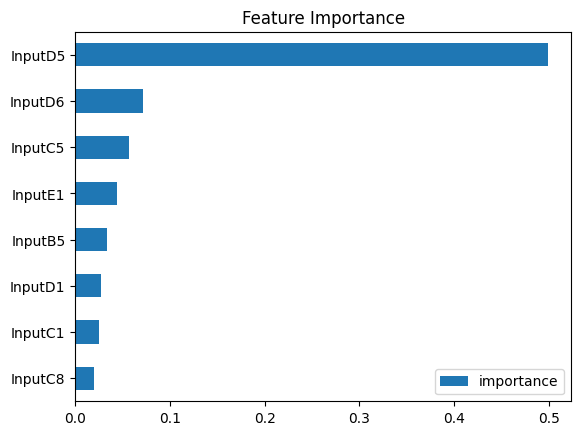

In [17]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance")[-8:].plot(kind="barh", title="Feature Importance")
plt.show()

D5 is the most important feature according to our regressor. D5 is the height of the container

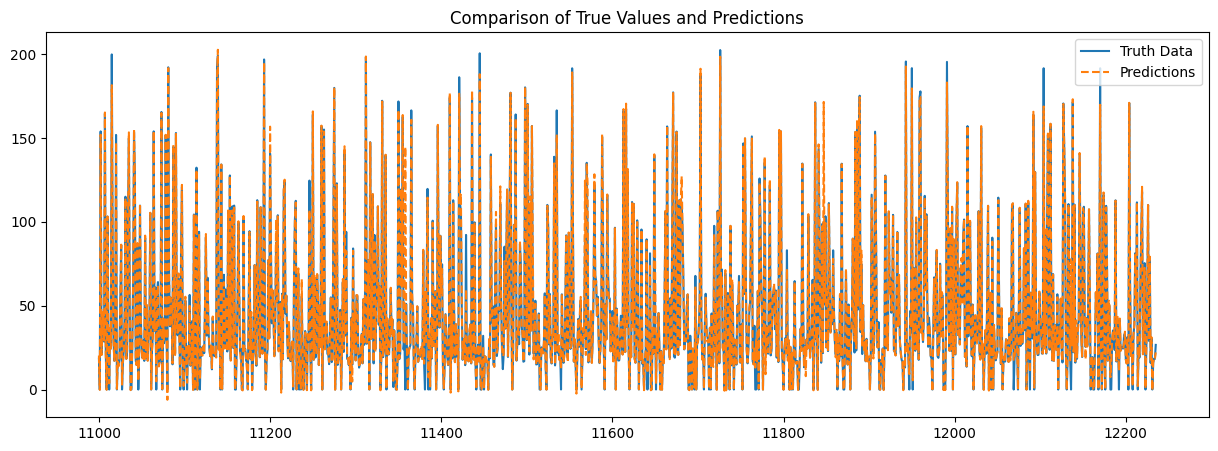

In [18]:
y_pred = reg.predict(X_val)
predict_df = pd.DataFrame({'True Values': y_val, 'Predictions': y_pred})
predict_df.index = X_val.index
plot_df = predict_df.reset_index()[11000:]

plt.figure(figsize=(15, 5))
plt.plot(plot_df['True Values'], label='Truth Data')
plt.plot(plot_df['Predictions'], label='Predictions',linestyle='--')
plt.legend()
plt.title('Comparison of True Values and Predictions')
plt.show()

Predictions for last 1000 entries

In [19]:
print("\n\nVAL SET:")
evaluate_model(reg, X_val, y_val)


print("\n\nTEST SET:")
evaluate_model(reg, X_test, y_test)



VAL SET:
Mean Absolute Error (MAE): 1.6829828720546074
Mean Squared Error (MSE): 28.539023553632582
Root Mean Squared Error (RMSE): 5.3421927664239695
R2 Score: 0.9854167484061042


TEST SET:
Mean Absolute Error (MAE): 1.7353868032548434
Mean Squared Error (MSE): 31.196227090593034
Root Mean Squared Error (RMSE): 5.585358277728747
R2 Score: 0.984105903489182


4.8 RMSE / 4.9 RMSE

5.2 / 5.7 when strategy for imputing is `most_frequent`

5.3 / 5.5 when strategy is `constant` and `fill_value=0`


Some other improvements would be to scale the data, since on the charts we can see that some columns have a long tail

XGB looks very promising, let's try improving it. To do that we will use `Optuna`, a framework for finding the best hyperparameters

In [20]:
!pip install optuna

In [21]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error


def objective(trial):
    """
    Using Optuna to find the best hyperparameters
    """
    # Define the search space for hyperparameters
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'num_boost_round': 100000, # Fix the boosting round and use early stopping
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 10.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'lambda': trial.suggest_float('lambda', 0.1, 10.0),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),
    }

    # Split the data into further training and validation sets (three sets are preferable)
    train_data, valid_data, train_target, valid_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Convert the data into DMatrix format
    dtrain = xgb.DMatrix(train_data, label=train_target)
    dvalid = xgb.DMatrix(valid_data, label=valid_target)

    # Define the pruning callback for early stopping
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation-rmse')

    # Train the model with early stopping
    model = xgb.train(param, dtrain, evals=[(dvalid, 'validation')], early_stopping_rounds=100, callbacks=[pruning_callback])

    # Make predictions on the test set
    dtest = xgb.DMatrix(valid_data)
    y_pred = model.predict(dtest)

    # Calculate the root mean squared error
    rmse = mean_squared_error(valid_target, y_pred, squared=False)

    return rmse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) # Control the number of trials

# Print the best hyperparameters and the best RMSE
best_params = study.best_params
best_rmse = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best RMSE: ", best_rmse)


[I 2023-11-26 13:30:13,531] A new study created in memory with name: no-name-05ea8ae7-ccc0-4ce5-9935-aaee7ade7b46
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:43.39655
[1]	validation-rmse:42.25214
[2]	validation-rmse:41.13764
[3]	validation-rmse:40.07409
[4]	validation-rmse:39.11470
[5]	validation-rmse:38.11805
[6]	validation-rmse:37.19021
[7]	validation-rmse:36.28958
[8]	validation-rmse:35.43386
[9]	validation-rmse:34.59339


[I 2023-11-26 13:30:14,348] Trial 0 finished with value: 34.59339336760807 and parameters: {'eta': 0.03266225541086258, 'max_depth': 7, 'subsample': 0.8756372005484645, 'colsample_bytree': 0.5824378235131756, 'gamma': 8.010202678654682, 'min_child_weight': 2.946872305233921, 'lambda': 2.2884763444843776, 'alpha': 2.661461515581246}. Best is trial 0 with value: 34.59339336760807.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:36.62346
[1]	validation-rmse:30.54750
[2]	validation-rmse:25.70629
[3]	validation-rmse:22.21825
[4]	validation-rmse:19.49312
[5]	validation-rmse:17.41037
[6]	validation-rmse:15.86995
[7]	validation-rmse:14.61791
[8]	validation-rmse:13.65120
[9]	validation-rmse:12.89209


[I 2023-11-26 13:30:15,183] Trial 1 finished with value: 12.892090095789042 and parameters: {'eta': 0.20896588560194004, 'max_depth': 9, 'subsample': 0.8318120354631544, 'colsample_bytree': 0.5430695258237748, 'gamma': 3.73759999778287, 'min_child_weight': 9.526213370275974, 'lambda': 0.6879762140590026, 'alpha': 9.41055275925588}. Best is trial 1 with value: 12.892090095789042.


[0]	validation-rmse:40.60997
[1]	validation-rmse:37.16287


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:34.18902
[3]	validation-rmse:31.69773
[4]	validation-rmse:29.55879
[5]	validation-rmse:27.74235
[6]	validation-rmse:26.22863
[7]	validation-rmse:24.87985
[8]	validation-rmse:23.77289
[9]	validation-rmse:22.83194


[I 2023-11-26 13:30:15,859] Trial 2 finished with value: 22.831941718168423 and parameters: {'eta': 0.11929215500774497, 'max_depth': 5, 'subsample': 0.9852873024517871, 'colsample_bytree': 0.9920352439966149, 'gamma': 3.831551584678392, 'min_child_weight': 4.07986585690156, 'lambda': 5.56162108919356, 'alpha': 5.74231142885326}. Best is trial 1 with value: 12.892090095789042.


[0]	validation-rmse:42.81804
[1]	validation-rmse:41.14930
[2]	validation-rmse:39.61667
[3]	validation-rmse:38.20426
[4]	validation-rmse:36.88918
[5]	validation-rmse:35.68961
[6]	validation-rmse:34.61300
[7]	validation-rmse:33.64162
[8]	validation-rmse:32.68399
[9]	validation-rmse:31.78279


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:16,004] Trial 3 finished with value: 31.782785099138973 and parameters: {'eta': 0.0590058940914072, 'max_depth': 3, 'subsample': 0.7703910141620782, 'colsample_bytree': 0.8648211005117847, 'gamma': 0.6985706519406398, 'min_child_weight': 2.196587865082727, 'lambda': 7.849415938928968, 'alpha': 7.085519994102633}. Best is trial 1 with value: 12.892090095789042.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:37.92282
[1]	validation-rmse:32.78051
[2]	validation-rmse:28.43127
[3]	validation-rmse:24.87098
[4]	validation-rmse:22.11235
[5]	validation-rmse:19.96623
[6]	validation-rmse:18.19811
[7]	validation-rmse:16.84325
[8]	validation-rmse:15.88349
[9]	validation-rmse:15.03165


[I 2023-11-26 13:30:16,302] Trial 4 finished with value: 15.031653997632333 and parameters: {'eta': 0.1755044636357078, 'max_depth': 8, 'subsample': 0.8621158557701927, 'colsample_bytree': 0.9925967386808121, 'gamma': 7.163258356466049, 'min_child_weight': 8.801107599987253, 'lambda': 0.34645093827263335, 'alpha': 7.617122421531805}. Best is trial 1 with value: 12.892090095789042.


[0]	validation-rmse:34.79978
[1]	validation-rmse:28.71250
[2]	validation-rmse:24.63462
[3]	validation-rmse:22.10124
[4]	validation-rmse:20.45245
[5]	validation-rmse:19.43933
[6]	validation-rmse:18.65537
[7]	validation-rmse:17.89143
[8]	validation-rmse:17.46377
[9]	validation-rmse:16.98756


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:16,466] Trial 5 finished with value: 16.98755856658673 and parameters: {'eta': 0.29641778181255557, 'max_depth': 5, 'subsample': 0.8690266614084396, 'colsample_bytree': 0.9400423999178595, 'gamma': 4.465561384189474, 'min_child_weight': 6.70587738991504, 'lambda': 9.700332498048963, 'alpha': 3.6056842724210125}. Best is trial 1 with value: 12.892090095789042.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:16,556] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:30:16,640] Trial 7 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:43.09660


[I 2023-11-26 13:30:16,732] Trial 8 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:41.88034


[I 2023-11-26 13:30:16,827] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:36.64353
[1]	validation-rmse:30.54649
[2]	validation-rmse:25.82544
[3]	validation-rmse:22.16978
[4]	validation-rmse:19.52070
[5]	validation-rmse:17.25942
[6]	validation-rmse:15.50483
[7]	validation-rmse:14.24487
[8]	validation-rmse:13.31680
[9]	validation-rmse:12.50023


[I 2023-11-26 13:30:17,168] Trial 10 finished with value: 12.500229897511561 and parameters: {'eta': 0.2058052672633266, 'max_depth': 10, 'subsample': 0.6718801822906941, 'colsample_bytree': 0.7011407307687519, 'gamma': 2.754889661990523, 'min_child_weight': 9.573119570983108, 'lambda': 3.4429490069871687, 'alpha': 9.690986739876308}. Best is trial 10 with value: 12.500229897511561.


[0]	validation-rmse:36.55080
[1]	validation-rmse:30.38328
[2]	validation-rmse:25.66888
[3]	validation-rmse:21.97411


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:19.17494
[5]	validation-rmse:16.99417
[6]	validation-rmse:15.42672
[7]	validation-rmse:14.21207
[8]	validation-rmse:13.32883
[9]	validation-rmse:12.64729


[I 2023-11-26 13:30:17,496] Trial 11 finished with value: 12.647285143685492 and parameters: {'eta': 0.21001963278698352, 'max_depth': 10, 'subsample': 0.6613373587486049, 'colsample_bytree': 0.6911730160991072, 'gamma': 2.401486006798234, 'min_child_weight': 9.77692968088334, 'lambda': 3.859993463913616, 'alpha': 9.886295334988489}. Best is trial 10 with value: 12.500229897511561.


[0]	validation-rmse:36.02765
[1]	validation-rmse:29.62681
[2]	validation-rmse:24.76793


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:21.17724
[4]	validation-rmse:18.58194
[5]	validation-rmse:16.49527
[6]	validation-rmse:15.00256
[7]	validation-rmse:13.86954
[8]	validation-rmse:13.06335
[9]	validation-rmse:12.41252


[I 2023-11-26 13:30:17,848] Trial 12 finished with value: 12.412515349320575 and parameters: {'eta': 0.22217090892424343, 'max_depth': 10, 'subsample': 0.6549558381869447, 'colsample_bytree': 0.7173289585517733, 'gamma': 2.3865289311032827, 'min_child_weight': 9.764694233682054, 'lambda': 3.8270955123848873, 'alpha': 9.918688127860545}. Best is trial 12 with value: 12.412515349320575.


[0]	validation-rmse:35.11549
[1]	validation-rmse:28.34085


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:23.25387
[3]	validation-rmse:19.76801
[4]	validation-rmse:17.22140
[5]	validation-rmse:15.39635
[6]	validation-rmse:14.08365
[7]	validation-rmse:13.22738
[8]	validation-rmse:12.58714
[9]	validation-rmse:12.07482


[I 2023-11-26 13:30:18,178] Trial 13 finished with value: 12.074819393259391 and parameters: {'eta': 0.2480901481686717, 'max_depth': 10, 'subsample': 0.506907156977676, 'colsample_bytree': 0.7501462239273526, 'gamma': 0.6116947187600834, 'min_child_weight': 8.080729044168184, 'lambda': 4.012170375361881, 'alpha': 8.993522883912124}. Best is trial 13 with value: 12.074819393259391.


[0]	validation-rmse:34.87132
[1]	validation-rmse:28.25026
[2]	validation-rmse:23.47163
[3]	validation-rmse:20.22856
[4]	validation-rmse:17.99734
[5]	validation-rmse:16.26186


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation-rmse:14.91989
[7]	validation-rmse:14.06864
[8]	validation-rmse:13.60846
[9]	validation-rmse:13.20663


[I 2023-11-26 13:30:18,432] Trial 14 finished with value: 13.20662752221333 and parameters: {'eta': 0.26368394289076935, 'max_depth': 8, 'subsample': 0.5009404164291171, 'colsample_bytree': 0.7834096146717028, 'gamma': 0.16845523957500896, 'min_child_weight': 7.7398030753501565, 'lambda': 4.311828023544911, 'alpha': 8.376689541094207}. Best is trial 13 with value: 12.074819393259391.


[0]	validation-rmse:34.70563
[1]	validation-rmse:27.88969
[2]	validation-rmse:23.10272
[3]	validation-rmse:19.81210
[4]	validation-rmse:17.58082
[5]	validation-rmse:15.52569


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation-rmse:14.28317
[7]	validation-rmse:13.41956
[8]	validation-rmse:12.83383
[9]	validation-rmse:12.43168


[I 2023-11-26 13:30:18,703] Trial 15 finished with value: 12.431684483716204 and parameters: {'eta': 0.26574541220796727, 'max_depth': 9, 'subsample': 0.5039825454927181, 'colsample_bytree': 0.7374020531596793, 'gamma': 1.3008577437354156, 'min_child_weight': 7.860379608736508, 'lambda': 6.053337769814034, 'alpha': 6.135496059215044}. Best is trial 13 with value: 12.074819393259391.


[0]	validation-rmse:35.39931
[1]	validation-rmse:28.76566
[2]	validation-rmse:23.80039


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:20.27368
[4]	validation-rmse:17.61036
[5]	validation-rmse:15.52465
[6]	validation-rmse:14.12494
[7]	validation-rmse:13.18150
[8]	validation-rmse:12.43098
[9]	validation-rmse:11.85772


[I 2023-11-26 13:30:19,049] Trial 16 finished with value: 11.85772382154453 and parameters: {'eta': 0.24097994102989156, 'max_depth': 10, 'subsample': 0.5989211334770324, 'colsample_bytree': 0.7750194480167993, 'gamma': 0.05843458522451195, 'min_child_weight': 8.118464791722957, 'lambda': 4.604618297346665, 'alpha': 8.546321785628287}. Best is trial 16 with value: 11.85772382154453.


[0]	validation-rmse:35.54769
[1]	validation-rmse:29.26329
[2]	validation-rmse:24.90610
[3]	validation-rmse:21.86423
[4]	validation-rmse:19.73325


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:19,213] Trial 17 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:33.70683
[1]	validation-rmse:26.42910
[2]	validation-rmse:21.64168
[3]	validation-rmse:18.33676
[4]	validation-rmse:16.11738
[5]	validation-rmse:14.39528
[6]	validation-rmse:13.33230
[7]	validation-rmse:12.66388
[8]	validation-rmse:12.06786
[9]	validation-rmse:11.67298


[I 2023-11-26 13:30:19,519] Trial 18 finished with value: 11.672978430779096 and parameters: {'eta': 0.29419306989379646, 'max_depth': 9, 'subsample': 0.6015297097544485, 'colsample_bytree': 0.7926371675846234, 'gamma': 1.0619101729616627, 'min_child_weight': 7.050098384374291, 'lambda': 6.874753736581376, 'alpha': 6.515431882783956}. Best is trial 18 with value: 11.672978430779096.


[0]	validation-rmse:33.77807
[1]	validation-rmse:26.53340
[2]	validation-rmse:21.69080


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.50808
[4]	validation-rmse:16.33042
[5]	validation-rmse:14.81815
[6]	validation-rmse:13.56535
[7]	validation-rmse:12.84844
[8]	validation-rmse:12.19634
[9]	validation-rmse:11.86690


[I 2023-11-26 13:30:19,830] Trial 19 finished with value: 11.86689877828485 and parameters: {'eta': 0.291603649999327, 'max_depth': 9, 'subsample': 0.6200820438146772, 'colsample_bytree': 0.8214027360709503, 'gamma': 1.3271754116266177, 'min_child_weight': 6.778542439815726, 'lambda': 6.961463749033637, 'alpha': 6.53300434856264}. Best is trial 18 with value: 11.672978430779096.


[0]	validation-rmse:33.66816
[1]	validation-rmse:26.50384
[2]	validation-rmse:21.61467
[3]	validation-rmse:18.65536
[4]	validation-rmse:16.71507
[5]	validation-rmse:15.33288


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation-rmse:14.51634
[7]	validation-rmse:13.69154
[8]	validation-rmse:13.18644
[9]	validation-rmse:12.73616


[I 2023-11-26 13:30:20,077] Trial 20 pruned. Trial was pruned at iteration 9.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.99996
[1]	validation-rmse:26.87847
[2]	validation-rmse:22.02858
[3]	validation-rmse:18.78113
[4]	validation-rmse:16.55977
[5]	validation-rmse:14.75486
[6]	validation-rmse:13.62932
[7]	validation-rmse:13.00198
[8]	validation-rmse:12.38618
[9]	validation-rmse:11.87351


[I 2023-11-26 13:30:20,592] Trial 21 finished with value: 11.873505120415505 and parameters: {'eta': 0.28473153657987543, 'max_depth': 9, 'subsample': 0.6112789374051307, 'colsample_bytree': 0.8278827942551822, 'gamma': 1.3882372601952446, 'min_child_weight': 6.938170105936786, 'lambda': 7.398900831898031, 'alpha': 6.627013848267213}. Best is trial 18 with value: 11.672978430779096.


[0]	validation-rmse:34.19379
[1]	validation-rmse:27.07781
[2]	validation-rmse:22.16853
[3]	validation-rmse:18.79512


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:16.44753
[5]	validation-rmse:14.60337
[6]	validation-rmse:13.41466
[7]	validation-rmse:12.70112
[8]	validation-rmse:12.00428
[9]	validation-rmse:11.60948


[I 2023-11-26 13:30:20,916] Trial 22 finished with value: 11.609477369524942 and parameters: {'eta': 0.2787477745458571, 'max_depth': 9, 'subsample': 0.6265401608706241, 'colsample_bytree': 0.8074294031284055, 'gamma': 1.3494176900698784, 'min_child_weight': 7.148837057832994, 'lambda': 6.595332991025823, 'alpha': 6.551266358703813}. Best is trial 22 with value: 11.609477369524942.


[0]	validation-rmse:36.10558


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:21,057] Trial 23 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.56226
[1]	validation-rmse:27.59493
[2]	validation-rmse:22.70565
[3]	validation-rmse:19.33976
[4]	validation-rmse:16.99791
[5]	validation-rmse:15.15972
[6]	validation-rmse:14.06286
[7]	validation-rmse:13.19973
[8]	validation-rmse:12.52086
[9]	validation-rmse:12.15751


[I 2023-11-26 13:30:21,387] Trial 24 finished with value: 12.157512727278744 and parameters: {'eta': 0.266458195090528, 'max_depth': 9, 'subsample': 0.686915486510675, 'colsample_bytree': 0.8097625901365265, 'gamma': 0.9449889032263582, 'min_child_weight': 7.315035601048812, 'lambda': 5.214004047820263, 'alpha': 5.007749069640674}. Best is trial 22 with value: 11.609477369524942.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:21,510] Trial 25 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:34.28168
[1]	validation-rmse:27.15072
[2]	validation-rmse:22.14663
[3]	validation-rmse:18.73554
[4]	validation-rmse:16.22165
[5]	validation-rmse:14.51700
[6]	validation-rmse:13.24718
[7]	validation-rmse:12.36985
[8]	validation-rmse:11.79258
[9]	validation-rmse:11.35706


[I 2023-11-26 13:30:21,863] Trial 26 finished with value: 11.357058379162154 and parameters: {'eta': 0.27247966548348057, 'max_depth': 10, 'subsample': 0.6228138953739154, 'colsample_bytree': 0.772882318038168, 'gamma': 1.5652194986080046, 'min_child_weight': 7.586982818196345, 'lambda': 6.160872172765601, 'alpha': 6.78762857306366}. Best is trial 26 with value: 11.357058379162154.


[0]	validation-rmse:34.99254
[1]	validation-rmse:28.56013


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:22,001] Trial 27 pruned. Trial was pruned at iteration 2.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.41461
[1]	validation-rmse:26.07509
[2]	validation-rmse:21.14546
[3]	validation-rmse:17.90149
[4]	validation-rmse:15.79398
[5]	validation-rmse:14.23889
[6]	validation-rmse:13.33424
[7]	validation-rmse:12.76727
[8]	validation-rmse:12.23925
[9]	validation-rmse:11.91393


[I 2023-11-26 13:30:22,608] Trial 28 finished with value: 11.913927888815508 and parameters: {'eta': 0.29977109789347905, 'max_depth': 9, 'subsample': 0.6338549023715354, 'colsample_bytree': 0.8264340838045121, 'gamma': 1.7354674067943305, 'min_child_weight': 7.413609369128522, 'lambda': 5.759248308691015, 'alpha': 6.900967613578256}. Best is trial 26 with value: 11.357058379162154.


[0]	validation-rmse:34.59971
[1]	validation-rmse:27.78139
[2]	validation-rmse:23.06746
[3]	validation-rmse:19.85733
[4]	validation-rmse:17.72066


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation-rmse:16.00402


[I 2023-11-26 13:30:22,823] Trial 29 pruned. Trial was pruned at iteration 5.
[I 2023-11-26 13:30:22,954] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:34.94205
[1]	validation-rmse:28.10457
[2]	validation-rmse:23.24183


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:19.71856
[4]	validation-rmse:17.22164
[5]	validation-rmse:15.33630
[6]	validation-rmse:13.98891
[7]	validation-rmse:13.04668
[8]	validation-rmse:12.45895
[9]	validation-rmse:12.08880


[I 2023-11-26 13:30:23,313] Trial 31 finished with value: 12.08879832011354 and parameters: {'eta': 0.25432772535950693, 'max_depth': 10, 'subsample': 0.5993660677408961, 'colsample_bytree': 0.7565179244894442, 'gamma': 0.6260862134882107, 'min_child_weight': 8.382023929442317, 'lambda': 4.759742094319658, 'alpha': 6.024817243172036}. Best is trial 26 with value: 11.357058379162154.


[0]	validation-rmse:34.09280
[1]	validation-rmse:26.89351
[2]	validation-rmse:21.85473


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.56547
[4]	validation-rmse:16.08044
[5]	validation-rmse:14.36185
[6]	validation-rmse:13.09051
[7]	validation-rmse:12.33514
[8]	validation-rmse:11.79596
[9]	validation-rmse:11.34812


[I 2023-11-26 13:30:23,675] Trial 32 finished with value: 11.348120773481932 and parameters: {'eta': 0.27763646189171987, 'max_depth': 10, 'subsample': 0.5902335018861066, 'colsample_bytree': 0.7736866750550245, 'gamma': 1.9207462918906053, 'min_child_weight': 7.441370852076091, 'lambda': 6.2389926332613195, 'alpha': 8.90097232329138}. Best is trial 32 with value: 11.348120773481932.


[0]	validation-rmse:34.10437
[1]	validation-rmse:27.02858
[2]	validation-rmse:22.09754


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.80150
[4]	validation-rmse:16.44879
[5]	validation-rmse:14.80443
[6]	validation-rmse:13.59232
[7]	validation-rmse:12.83274
[8]	validation-rmse:12.25934
[9]	validation-rmse:11.92255


[I 2023-11-26 13:30:24,000] Trial 33 finished with value: 11.922552250147518 and parameters: {'eta': 0.2805679186862093, 'max_depth': 9, 'subsample': 0.6394882029789675, 'colsample_bytree': 0.804545262604856, 'gamma': 1.7399134766669442, 'min_child_weight': 7.094946092992047, 'lambda': 6.176974756989348, 'alpha': 7.226437180568166}. Best is trial 32 with value: 11.348120773481932.


[0]	validation-rmse:34.13226
[1]	validation-rmse:26.95327


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.80144
[3]	validation-rmse:18.42395
[4]	validation-rmse:15.86833
[5]	validation-rmse:14.06900
[6]	validation-rmse:12.80010
[7]	validation-rmse:11.89201
[8]	validation-rmse:11.35420
[9]	validation-rmse:10.97767


[I 2023-11-26 13:30:24,390] Trial 34 finished with value: 10.977665097684485 and parameters: {'eta': 0.27778995659080535, 'max_depth': 10, 'subsample': 0.5640023397988057, 'colsample_bytree': 0.8421611756412736, 'gamma': 3.354926321698149, 'min_child_weight': 6.404245771665156, 'lambda': 5.515482606643597, 'alpha': 9.024596275449227}. Best is trial 34 with value: 10.977665097684485.


[0]	validation-rmse:34.83291


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:27.84192
[2]	validation-rmse:22.93382
[3]	validation-rmse:19.30936
[4]	validation-rmse:16.77803
[5]	validation-rmse:14.92420
[6]	validation-rmse:13.69709
[7]	validation-rmse:12.73480
[8]	validation-rmse:12.06626
[9]	validation-rmse:11.65163


[I 2023-11-26 13:30:24,783] Trial 35 finished with value: 11.65162655490369 and parameters: {'eta': 0.25911135734626817, 'max_depth': 10, 'subsample': 0.5345465620088368, 'colsample_bytree': 0.8440441827899622, 'gamma': 3.4351505601887964, 'min_child_weight': 6.174758233514369, 'lambda': 5.690837353916189, 'alpha': 9.130337259312931}. Best is trial 34 with value: 10.977665097684485.


[0]	validation-rmse:34.17304
[1]	validation-rmse:27.03499


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.80936
[3]	validation-rmse:18.18050
[4]	validation-rmse:15.81147
[5]	validation-rmse:14.07103
[6]	validation-rmse:12.89783
[7]	validation-rmse:12.13345
[8]	validation-rmse:11.55596
[9]	validation-rmse:11.18019


[I 2023-11-26 13:30:25,154] Trial 36 finished with value: 11.18018558032622 and parameters: {'eta': 0.27573200345183424, 'max_depth': 10, 'subsample': 0.5748683499723235, 'colsample_bytree': 0.8514862964676978, 'gamma': 2.7319907561155903, 'min_child_weight': 6.415067397490772, 'lambda': 5.656276938770592, 'alpha': 9.168502080047089}. Best is trial 34 with value: 10.977665097684485.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:25,327] Trial 37 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:35.97082


[I 2023-11-26 13:30:25,606] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:30:26,807] Trial 39 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.41573
[1]	validation-rmse:27.50254
[2]	validation-rmse:22.79334
[3]	validation-rmse:19.74431


[I 2023-11-26 13:30:27,481] Trial 40 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:34.21685
[1]	validation-rmse:27.11525
[2]	validation-rmse:22.23604
[3]	validation-rmse:18.97217
[4]	validation-rmse:16.51212
[5]	validation-rmse:15.12420
[6]	validation-rmse:14.04378
[7]	validation-rmse:13.16317


[I 2023-11-26 13:30:28,084] Trial 41 pruned. Trial was pruned at iteration 8.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.93225
[1]	validation-rmse:26.62813
[2]	validation-rmse:21.59529
[3]	validation-rmse:18.25486
[4]	validation-rmse:15.94814
[5]	validation-rmse:14.44466
[6]	validation-rmse:13.29992
[7]	validation-rmse:12.48031
[8]	validation-rmse:11.78899
[9]	validation-rmse:11.29983


[I 2023-11-26 13:30:28,826] Trial 42 finished with value: 11.29983462462163 and parameters: {'eta': 0.2848414369968662, 'max_depth': 10, 'subsample': 0.5784978305672106, 'colsample_bytree': 0.774545294885742, 'gamma': 2.8217902170909923, 'min_child_weight': 6.558917043367048, 'lambda': 7.415854481305547, 'alpha': 7.699727007841531}. Best is trial 34 with value: 10.977665097684485.


[0]	validation-rmse:33.86985
[1]	validation-rmse:26.58054


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.39632
[3]	validation-rmse:18.13869
[4]	validation-rmse:15.73115
[5]	validation-rmse:13.98243
[6]	validation-rmse:12.86287
[7]	validation-rmse:12.06659
[8]	validation-rmse:11.52948
[9]	validation-rmse:11.01136


[I 2023-11-26 13:30:29,187] Trial 43 finished with value: 11.01136428327195 and parameters: {'eta': 0.28747920939782395, 'max_depth': 10, 'subsample': 0.5779572598826266, 'colsample_bytree': 0.7666047785536455, 'gamma': 4.818081361312065, 'min_child_weight': 5.648972918532361, 'lambda': 7.433352383952252, 'alpha': 7.856021073084022}. Best is trial 34 with value: 10.977665097684485.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:29,412] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:30:30,533] Trial 45 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:31,015] Trial 46 pr

[0]	validation-rmse:33.36533
[1]	validation-rmse:25.90235
[2]	validation-rmse:20.78425
[3]	validation-rmse:17.54007
[4]	validation-rmse:15.33754
[5]	validation-rmse:13.86680
[6]	validation-rmse:12.59651
[7]	validation-rmse:11.94430
[8]	validation-rmse:11.41405
[9]	validation-rmse:10.94403


[I 2023-11-26 13:30:32,683] Trial 47 finished with value: 10.944028504628749 and parameters: {'eta': 0.2997159714037209, 'max_depth': 10, 'subsample': 0.5847157893568975, 'colsample_bytree': 0.7612864299060731, 'gamma': 4.581357273008676, 'min_child_weight': 5.257128566690662, 'lambda': 7.4058276926850874, 'alpha': 7.806781226118369}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.59344
[1]	validation-rmse:26.40033
[2]	validation-rmse:21.71750
[3]	validation-rmse:18.63449
[4]	validation-rmse:16.38995
[5]	validation-rmse:15.03634
[6]	validation-rmse:13.90637


[I 2023-11-26 13:30:33,483] Trial 48 pruned. Trial was pruned at iteration 7.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.80933
[1]	validation-rmse:26.57063
[2]	validation-rmse:21.31663
[3]	validation-rmse:17.83625
[4]	validation-rmse:15.50064
[5]	validation-rmse:13.69696
[6]	validation-rmse:12.61234
[7]	validation-rmse:11.82556
[8]	validation-rmse:11.33775
[9]	validation-rmse:10.95864


[I 2023-11-26 13:30:34,413] Trial 49 finished with value: 10.958641174094383 and parameters: {'eta': 0.2878757609175137, 'max_depth': 10, 'subsample': 0.5524251000714661, 'colsample_bytree': 0.8561912464463673, 'gamma': 4.3585204512358535, 'min_child_weight': 5.459341653565053, 'lambda': 7.2190082536563205, 'alpha': 8.167605348275885}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:35.46661


[I 2023-11-26 13:30:34,804] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.89113
[1]	validation-rmse:26.67549
[2]	validation-rmse:21.42624
[3]	validation-rmse:17.96645
[4]	validation-rmse:15.70012
[5]	validation-rmse:14.04754
[6]	validation-rmse:12.80308
[7]	validation-rmse:11.96302
[8]	validation-rmse:11.47052
[9]	validation-rmse:11.09775


[I 2023-11-26 13:30:35,384] Trial 51 finished with value: 11.09775456442546 and parameters: {'eta': 0.28595864798829185, 'max_depth': 10, 'subsample': 0.5677329212933249, 'colsample_bytree': 0.866700602566539, 'gamma': 4.006060493748552, 'min_child_weight': 6.3065471834303874, 'lambda': 7.284583710022692, 'alpha': 8.169531696334271}. Best is trial 47 with value: 10.944028504628749.


[0]	validation-rmse:33.82476
[1]	validation-rmse:26.52724
[2]	validation-rmse:21.53833


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.07993
[4]	validation-rmse:15.96297
[5]	validation-rmse:14.35079
[6]	validation-rmse:13.17165
[7]	validation-rmse:12.39541
[8]	validation-rmse:11.75350
[9]	validation-rmse:11.45108


[I 2023-11-26 13:30:37,067] Trial 52 finished with value: 11.45107834889686 and parameters: {'eta': 0.2888455624116095, 'max_depth': 10, 'subsample': 0.5218446611051546, 'colsample_bytree': 0.8690601691832106, 'gamma': 3.959163709731072, 'min_child_weight': 5.269684415554475, 'lambda': 7.046881485932436, 'alpha': 8.15900285105382}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:37,226] Trial 53 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:34.72086


[I 2023-11-26 13:30:38,128] Trial 54 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.66759
[1]	validation-rmse:26.38659
[2]	validation-rmse:21.35489
[3]	validation-rmse:17.79919
[4]	validation-rmse:15.47843
[5]	validation-rmse:13.89431
[6]	validation-rmse:12.79146
[7]	validation-rmse:12.00063
[8]	validation-rmse:11.53186
[9]	validation-rmse:11.26242


[I 2023-11-26 13:30:38,808] Trial 55 finished with value: 11.262416849340903 and parameters: {'eta': 0.2898062303812621, 'max_depth': 10, 'subsample': 0.6077964006582706, 'colsample_bytree': 0.876201300894839, 'gamma': 4.155770842063604, 'min_child_weight': 6.55440734669011, 'lambda': 6.760859986102075, 'alpha': 7.201394833272587}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.60496
[1]	validation-rmse:26.31928
[2]	validation-rmse:21.31566
[3]	validation-rmse:17.86411
[4]	validation-rmse:15.59155
[5]	validation-rmse:14.09906
[6]	validation-rmse:12.98447
[7]	validation-rmse:12.35042
[8]	validation-rmse:11.85727
[9]	validation-rmse:11.55714


[I 2023-11-26 13:30:43,707] Trial 56 finished with value: 11.557139802220004 and parameters: {'eta': 0.2961171631105326, 'max_depth': 10, 'subsample': 0.5151586849460609, 'colsample_bytree': 0.9175317496578261, 'gamma': 3.7782561750129973, 'min_child_weight': 6.283765911618749, 'lambda': 8.176902113009886, 'alpha': 8.7639606277981}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:44,028] Trial 57 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.67862


[I 2023-11-26 13:30:44,728] Trial 58 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:35.66502


[I 2023-11-26 13:30:45,822] Trial 59 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:35.48137


[I 2023-11-26 13:30:46,620] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.66177
[1]	validation-rmse:26.30234
[2]	validation-rmse:21.30051
[3]	validation-rmse:17.66837
[4]	validation-rmse:15.53071
[5]	validation-rmse:13.96220
[6]	validation-rmse:12.83750
[7]	validation-rmse:12.22883
[8]	validation-rmse:11.71600
[9]	validation-rmse:11.30142


[I 2023-11-26 13:30:47,992] Trial 61 finished with value: 11.301419214459507 and parameters: {'eta': 0.28987340908294035, 'max_depth': 10, 'subsample': 0.6130463790778298, 'colsample_bytree': 0.8829920288804668, 'gamma': 3.97130857705777, 'min_child_weight': 6.378721038318684, 'lambda': 6.870292036347451, 'alpha': 7.1610425639599855}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.67487
[1]	validation-rmse:26.29635
[2]	validation-rmse:21.20579
[3]	validation-rmse:17.79094
[4]	validation-rmse:15.40387
[5]	validation-rmse:13.84696
[6]	validation-rmse:12.78656
[7]	validation-rmse:12.07289
[8]	validation-rmse:11.62633
[9]	validation-rmse:11.32558


[I 2023-11-26 13:30:50,457] Trial 62 finished with value: 11.325578954281058 and parameters: {'eta': 0.289298596073398, 'max_depth': 10, 'subsample': 0.6118564222396574, 'colsample_bytree': 0.8781029793825434, 'gamma': 4.236704976046195, 'min_child_weight': 6.041868554602556, 'lambda': 6.716706361539099, 'alpha': 7.894630998644291}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.57765
[1]	validation-rmse:26.28790
[2]	validation-rmse:21.31352
[3]	validation-rmse:17.82053
[4]	validation-rmse:15.62067
[5]	validation-rmse:14.08454
[6]	validation-rmse:12.96447
[7]	validation-rmse:12.23370
[8]	validation-rmse:11.62187
[9]	validation-rmse:11.26742


[I 2023-11-26 13:30:51,519] Trial 63 finished with value: 11.267416533439476 and parameters: {'eta': 0.29694014978596456, 'max_depth': 10, 'subsample': 0.5445460801999893, 'colsample_bytree': 0.8585656442654492, 'gamma': 3.242393986076055, 'min_child_weight': 6.851976068158815, 'lambda': 7.677390432297095, 'alpha': 7.594775150359127}. Best is trial 47 with value: 10.944028504628749.


[0]	validation-rmse:36.74754


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:51,643] Trial 64 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.96701
[1]	validation-rmse:26.80955
[2]	validation-rmse:22.07633
[3]	validation-rmse:18.78042


[I 2023-11-26 13:30:51,866] Trial 65 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:34.46480


[I 2023-11-26 13:30:52,038] Trial 66 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:34.08643
[1]	validation-rmse:26.82582
[2]	validation-rmse:21.96167


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.51301
[4]	validation-rmse:16.11323
[5]	validation-rmse:14.32395
[6]	validation-rmse:13.14699
[7]	validation-rmse:12.29539
[8]	validation-rmse:11.69993
[9]	validation-rmse:11.39138


[I 2023-11-26 13:30:52,379] Trial 67 finished with value: 11.391377366499206 and parameters: {'eta': 0.27915811060876916, 'max_depth': 10, 'subsample': 0.5519394828352174, 'colsample_bytree': 0.8155960665995929, 'gamma': 5.07465128470289, 'min_child_weight': 6.115400146985918, 'lambda': 6.0918477873395585, 'alpha': 8.52862901464026}. Best is trial 47 with value: 10.944028504628749.


[0]	validation-rmse:33.60857


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:26.38997
[2]	validation-rmse:21.26891
[3]	validation-rmse:18.05833
[4]	validation-rmse:15.65661
[5]	validation-rmse:14.20029
[6]	validation-rmse:13.13848
[7]	validation-rmse:12.37705
[8]	validation-rmse:11.93225
[9]	validation-rmse:11.65578


[I 2023-11-26 13:30:52,789] Trial 68 finished with value: 11.655782826378429 and parameters: {'eta': 0.2974371045815484, 'max_depth': 9, 'subsample': 0.5253759077382383, 'colsample_bytree': 0.9255491071838797, 'gamma': 4.2525638847326865, 'min_child_weight': 4.820513923303077, 'lambda': 7.636311253325503, 'alpha': 7.410148835867527}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:53,021] Trial 69 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.28261


[I 2023-11-26 13:30:53,921] Trial 70 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.47517
[1]	validation-rmse:26.16815
[2]	validation-rmse:21.12786
[3]	validation-rmse:17.62598
[4]	validation-rmse:15.46226
[5]	validation-rmse:13.96279
[6]	validation-rmse:13.01201
[7]	validation-rmse:12.40582
[8]	validation-rmse:11.95082
[9]	validation-rmse:11.63156


[I 2023-11-26 13:30:56,413] Trial 71 finished with value: 11.631556067974806 and parameters: {'eta': 0.2998522125650565, 'max_depth': 10, 'subsample': 0.5459161365401808, 'colsample_bytree': 0.8711101204452281, 'gamma': 3.0494789113601555, 'min_child_weight': 6.893925838502334, 'lambda': 7.797517204615365, 'alpha': 7.631124030712121}. Best is trial 47 with value: 10.944028504628749.


[0]	validation-rmse:33.77439
[1]	validation-rmse:26.50673


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.29974
[3]	validation-rmse:17.68195
[4]	validation-rmse:15.32783
[5]	validation-rmse:13.68314
[6]	validation-rmse:12.60977
[7]	validation-rmse:12.00411
[8]	validation-rmse:11.52463
[9]	validation-rmse:11.16050


[I 2023-11-26 13:30:57,011] Trial 72 finished with value: 11.160502080273277 and parameters: {'eta': 0.2890605894633374, 'max_depth': 10, 'subsample': 0.5625168082957025, 'colsample_bytree': 0.8588452743600922, 'gamma': 3.3040540988166667, 'min_child_weight': 6.639065736534641, 'lambda': 7.25010329129238, 'alpha': 7.546510632924831}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.05916
[1]	validation-rmse:26.90155
[2]	validation-rmse:21.66415
[3]	validation-rmse:17.95312
[4]	validation-rmse:15.59918
[5]	validation-rmse:13.84778
[6]	validation-rmse:12.71106
[7]	validation-rmse:11.98960
[8]	validation-rmse:11.42223
[9]	validation-rmse:11.08808


[I 2023-11-26 13:30:58,399] Trial 73 finished with value: 11.088078836278992 and parameters: {'eta': 0.2818961938979024, 'max_depth': 10, 'subsample': 0.565499592698373, 'colsample_bytree': 0.8356970084675734, 'gamma': 4.079573321252096, 'min_child_weight': 6.309942997606748, 'lambda': 7.236373207204281, 'alpha': 8.351454022942422}. Best is trial 47 with value: 10.944028504628749.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:58,971] Trial 74 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:30:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:30:59,752] Trial 75 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/

[0]	validation-rmse:34.24176


[I 2023-11-26 13:31:01,253] Trial 76 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.41722


[I 2023-11-26 13:31:01,745] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:31:01,889] Trial 78 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.65475
[1]	validation-rmse:26.41098
[2]	validation-rmse:21.68609
[3]	validation-rmse:18.42746
[4]	validation-rmse:16.09349
[5]	validation-rmse:14.73411


[I 2023-11-26 13:31:02,120] Trial 79 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:35.10890


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:31:02,255] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.64872
[1]	validation-rmse:26.25779
[2]	validation-rmse:21.08815
[3]	validation-rmse:17.67288
[4]	validation-rmse:15.31631
[5]	validation-rmse:13.78417
[6]	validation-rmse:12.66819
[7]	validation-rmse:11.90174
[8]	validation-rmse:11.38478
[9]	validation-rmse:10.93875


[I 2023-11-26 13:31:02,637] Trial 81 finished with value: 10.938748546583327 and parameters: {'eta': 0.289681858957342, 'max_depth': 10, 'subsample': 0.5814957751646546, 'colsample_bytree': 0.865185700455579, 'gamma': 4.214618591555782, 'min_child_weight': 6.703557580093814, 'lambda': 6.642679849568303, 'alpha': 6.8145751322941575}. Best is trial 81 with value: 10.938748546583327.


[0]	validation-rmse:33.92487
[1]	validation-rmse:26.71703


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.51548
[3]	validation-rmse:17.83049
[4]	validation-rmse:15.47038
[5]	validation-rmse:13.84545
[6]	validation-rmse:12.74466
[7]	validation-rmse:12.06227
[8]	validation-rmse:11.54595
[9]	validation-rmse:11.16641


[I 2023-11-26 13:31:02,994] Trial 82 finished with value: 11.166411510917566 and parameters: {'eta': 0.2827351175588618, 'max_depth': 10, 'subsample': 0.5824206430101028, 'colsample_bytree': 0.835209604977694, 'gamma': 4.122929060513627, 'min_child_weight': 6.415498791159819, 'lambda': 6.470162569274332, 'alpha': 6.79563361979436}. Best is trial 81 with value: 10.938748546583327.


[0]	validation-rmse:33.94682
[1]	validation-rmse:26.64207


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.57377
[3]	validation-rmse:18.03349
[4]	validation-rmse:15.70795
[5]	validation-rmse:14.05026
[6]	validation-rmse:12.93534
[7]	validation-rmse:12.24573
[8]	validation-rmse:11.74154
[9]	validation-rmse:11.30791


[I 2023-11-26 13:31:03,370] Trial 83 finished with value: 11.307908293207337 and parameters: {'eta': 0.2821522808346165, 'max_depth': 10, 'subsample': 0.5852109456297361, 'colsample_bytree': 0.8649070453285974, 'gamma': 4.555578160680393, 'min_child_weight': 5.631981433847075, 'lambda': 7.184503078721517, 'alpha': 6.891164949973894}. Best is trial 81 with value: 10.938748546583327.


[0]	validation-rmse:33.73190
[1]	validation-rmse:26.40496
[2]	validation-rmse:21.44121


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:18.12968
[4]	validation-rmse:15.78475
[5]	validation-rmse:14.08018
[6]	validation-rmse:12.98017
[7]	validation-rmse:12.25431
[8]	validation-rmse:11.62328
[9]	validation-rmse:11.18757


[I 2023-11-26 13:31:03,724] Trial 84 finished with value: 11.187574518384817 and parameters: {'eta': 0.2891640584489545, 'max_depth': 10, 'subsample': 0.5299908443629991, 'colsample_bytree': 0.8011838466984904, 'gamma': 3.7960903692024974, 'min_child_weight': 5.99313270730153, 'lambda': 6.345790101311707, 'alpha': 7.426239591562515}. Best is trial 81 with value: 10.938748546583327.


[0]	validation-rmse:33.73917
[1]	validation-rmse:26.61664


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.51360
[3]	validation-rmse:18.30057
[4]	validation-rmse:16.15246


[I 2023-11-26 13:31:03,966] Trial 85 pruned. Trial was pruned at iteration 4.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:31:04,133] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:31:04,298] Trial 87 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.32073
[1]	validation-rmse:25.88787
[2]	validation-rmse:20.65382
[3]	validation-rmse:17.21947
[4]	validation-rmse:14.75634
[5]	validation-rmse:13.17631
[6]	validation-rmse:12.03840
[7]	validation-rmse:11.36559
[8]	validation-rmse:10.81259
[9]	validation-rmse:10.47197


[I 2023-11-26 13:31:04,691] Trial 88 finished with value: 10.47197409108134 and parameters: {'eta': 0.29972415295939203, 'max_depth': 10, 'subsample': 0.5716605584401666, 'colsample_bytree': 0.8888281277597001, 'gamma': 4.027773825862948, 'min_child_weight': 5.3559248724547945, 'lambda': 6.7216066038503435, 'alpha': 8.049884428703974}. Best is trial 88 with value: 10.47197409108134.


[0]	validation-rmse:33.73294
[1]	validation-rmse:26.57334


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.47180
[3]	validation-rmse:18.00813
[4]	validation-rmse:15.92396
[5]	validation-rmse:14.43516


[I 2023-11-26 13:31:04,958] Trial 89 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:34.32020


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:31:05,139] Trial 90 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.83702
[1]	validation-rmse:26.57933
[2]	validation-rmse:21.37675
[3]	validation-rmse:17.75712
[4]	validation-rmse:15.48706
[5]	validation-rmse:13.80233
[6]	validation-rmse:12.61243
[7]	validation-rmse:11.82403
[8]	validation-rmse:11.35646
[9]	validation-rmse:10.88396


[I 2023-11-26 13:31:05,517] Trial 91 finished with value: 10.883960802041338 and parameters: {'eta': 0.2846011159720057, 'max_depth': 10, 'subsample': 0.5838059349694147, 'colsample_bytree': 0.8490602792132972, 'gamma': 4.020884845508996, 'min_child_weight': 5.944305198030527, 'lambda': 6.178955570318282, 'alpha': 7.399447127866624}. Best is trial 88 with value: 10.47197409108134.


[0]	validation-rmse:33.33351
[1]	validation-rmse:25.87803


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:20.73655
[3]	validation-rmse:17.06886
[4]	validation-rmse:14.67384
[5]	validation-rmse:13.15000
[6]	validation-rmse:12.07374
[7]	validation-rmse:11.44278
[8]	validation-rmse:10.99179
[9]	validation-rmse:10.71476


[I 2023-11-26 13:31:05,885] Trial 92 finished with value: 10.714756718464338 and parameters: {'eta': 0.29792453033914873, 'max_depth': 10, 'subsample': 0.5987040476788311, 'colsample_bytree': 0.8918036520682636, 'gamma': 3.9983785919220387, 'min_child_weight': 5.935984996316858, 'lambda': 6.132615689719493, 'alpha': 7.406196598354069}. Best is trial 88 with value: 10.47197409108134.


[0]	validation-rmse:33.29527
[1]	validation-rmse:25.75864
[2]	validation-rmse:20.60966


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:17.26630
[4]	validation-rmse:14.96339
[5]	validation-rmse:13.51203
[6]	validation-rmse:12.34155
[7]	validation-rmse:11.71396
[8]	validation-rmse:11.16292
[9]	validation-rmse:10.74102


[I 2023-11-26 13:31:06,249] Trial 93 finished with value: 10.741022064834825 and parameters: {'eta': 0.299052331929023, 'max_depth': 10, 'subsample': 0.5978125471958501, 'colsample_bytree': 0.8889193180647699, 'gamma': 3.9696131694425296, 'min_child_weight': 6.005415391504082, 'lambda': 6.2642035266010225, 'alpha': 7.772983272766235}. Best is trial 88 with value: 10.47197409108134.


[0]	validation-rmse:33.41031


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:25.96637
[2]	validation-rmse:20.89295
[3]	validation-rmse:17.11869
[4]	validation-rmse:14.78204
[5]	validation-rmse:13.19954
[6]	validation-rmse:12.05469
[7]	validation-rmse:11.42984
[8]	validation-rmse:10.97951
[9]	validation-rmse:10.71694


[I 2023-11-26 13:31:06,801] Trial 94 finished with value: 10.716942960112117 and parameters: {'eta': 0.29661761742513215, 'max_depth': 10, 'subsample': 0.6213859334666102, 'colsample_bytree': 0.896613872216278, 'gamma': 3.674327952603266, 'min_child_weight': 5.0259699827051865, 'lambda': 6.214401195183539, 'alpha': 7.3818083167987085}. Best is trial 88 with value: 10.47197409108134.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.31832
[1]	validation-rmse:25.80312
[2]	validation-rmse:20.64857
[3]	validation-rmse:16.97413
[4]	validation-rmse:14.58266
[5]	validation-rmse:13.03393
[6]	validation-rmse:12.01844
[7]	validation-rmse:11.40714
[8]	validation-rmse:10.82267
[9]	validation-rmse:10.48118


[I 2023-11-26 13:31:08,770] Trial 95 finished with value: 10.481180489475706 and parameters: {'eta': 0.29878876359352435, 'max_depth': 10, 'subsample': 0.6185326772509069, 'colsample_bytree': 0.8969655834328548, 'gamma': 3.6501101637608833, 'min_child_weight': 4.941467282903103, 'lambda': 5.784679633887684, 'alpha': 7.36443607498293}. Best is trial 88 with value: 10.47197409108134.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.87703
[1]	validation-rmse:27.04715


[I 2023-11-26 13:31:09,040] Trial 96 pruned. Trial was pruned at iteration 1.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.51990
[1]	validation-rmse:25.91686
[2]	validation-rmse:20.74551
[3]	validation-rmse:17.31428
[4]	validation-rmse:15.05614
[5]	validation-rmse:13.47038
[6]	validation-rmse:12.38321
[7]	validation-rmse:11.71923
[8]	validation-rmse:11.17175
[9]	validation-rmse:10.84091


[I 2023-11-26 13:31:09,549] Trial 97 finished with value: 10.8409119041109 and parameters: {'eta': 0.2934280412027779, 'max_depth': 10, 'subsample': 0.6174198418084902, 'colsample_bytree': 0.9010454639948005, 'gamma': 3.5524865278712805, 'min_child_weight': 4.67763461233452, 'lambda': 6.2275886718447495, 'alpha': 7.083057844724839}. Best is trial 88 with value: 10.47197409108134.


[0]	validation-rmse:33.58061
[1]	validation-rmse:26.24724


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:21.35760
[3]	validation-rmse:17.82640
[4]	validation-rmse:15.75256
[5]	validation-rmse:14.18427
[6]	validation-rmse:13.11079
[7]	validation-rmse:12.45130


[I 2023-11-26 13:31:09,879] Trial 98 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:33.57767
[1]	validation-rmse:26.17966
[2]	validation-rmse:21.06473
[3]	validation-rmse:17.42696
[4]	validation-rmse:15.16961
[5]	validation-rmse:13.49374
[6]	validation-rmse:12.37217
[7]	validation-rmse:11.73777
[8]	validation-rmse:11.19591
[9]	validation-rmse:10.78145


[I 2023-11-26 13:31:10,326] Trial 99 finished with value: 10.781446490460409 and parameters: {'eta': 0.2918954770684763, 'max_depth': 10, 'subsample': 0.6360910775327909, 'colsample_bytree': 0.9044400828769065, 'gamma': 3.5455643800802763, 'min_child_weight': 5.345094947339029, 'lambda': 6.293924224422902, 'alpha': 7.149095083897566}. Best is trial 88 with value: 10.47197409108134.


Best Hyperparameters:  {'eta': 0.29972415295939203, 'max_depth': 10, 'subsample': 0.5716605584401666, 'colsample_bytree': 0.8888281277597001, 'gamma': 4.027773825862948, 'min_child_weight': 5.3559248724547945, 'lambda': 6.7216066038503435, 'alpha': 8.049884428703974}
Best RMSE:  10.47197409108134


Best Hyperparameters:  {'eta': 0.29967676424275075, 'max_depth': 10, 'subsample': 0.9868471272771134, 'colsample_bytree': 0.8352332105721674, 'gamma': 5.070672686392608, 'min_child_weight': 8.064241707732917, 'lambda': 7.154284975321658, 'alpha': 6.652325305899456}

## LSTM

An LSTM is good for time series data, the forget mechanism makes sure that only the relevant data is used.

In [22]:
!pip install keras

In [ ]:
import keras
from keras.layers import LSTM, Dense
# Reshape the data to be LSTM compliant, LSTMs need 3D input
transformed_X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
transformed_X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

n_timesteps, n_features, n_outputs = transformed_X_train.shape[1], transformed_X_train.shape[2], 1

def build_lstm(X_train, y_train, X_test, y_test, epochs=25, batch_size=32):
    """
    Build an LSTM model
    """

    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Store the best model
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    # Build the network
    model = keras.Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs))
    print('compiling baseline model...')
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
    print('fitting model...')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)
    return model, history

model, history = build_lstm(X_train, y_train, X_test, y_test)


compiling baseline model...
fitting model...
Epoch 1/25
1530/1530 [==============================] - 12s 5ms/step - loss: 718.5342 - mae: 18.5343 - mape: 1918276864.0000 - val_loss: 569.5583 - val_mae: 14.8019 - val_mape: 1336735104.0000
Epoch 2/25
1530/1530 [==============================] - 9s 6ms/step - loss: 550.7545 - mae: 15.2536 - mape: 1716022528.0000 - val_loss: 532.9285 - val_mae: 15.2184 - val_mape: 1721392512.0000
Epoch 3/25
1530/1530 [==============================] - 9s 6ms/step - loss: 506.7273 - mae: 14.2003 - mape: 1681171328.0000 - val_loss: 498.7519 - val_mae: 13.5268 - val_mape: 1470271104.0000
Epoch 4/25
1530/1530 [==============================] - 8s 5ms/step - loss: 483.8163 - mae: 13.6278 - mape: 1627520384.0000 - val_loss: 565.4475 - val_mae: 14.4385 - val_mape: 1302100096.0000
Epoch 5/25
1530/1530 [==============================] - 8s 5ms/step - loss: 466.2129 - mae: 13.2499 - mape: 1607532416.0000 - val_loss: 485.7451 - val_mae: 13.1781 - val_mape: 1385920256

In [ ]:
evaluate_model(model, X_test, y_test, is_3d=True)

## Transformer
Transformers work with attention, they can compute in parallel and are very good for large datasets

In [ ]:
from keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=None):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size,
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0, attention_axes=None) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2,
                                num_trans_blocks=4, mlp_units=[256],
                                mlp_dropout=0.10, dropout=0.10,
                                attention_axes=1)

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)]

t_hist = transformer.fit(transformed_X_train, y_train, batch_size=32,
                         epochs=25, validation_data=(transformed_X_test, y_test),
                         verbose=1, callbacks=callbacks)

In [ ]:
evaluate_model(transformer,X_test,y_test,True)

It looks like the XGBoost remains victorious

In [ ]:
evaluate_model(reg,X_test,y_test)